#분석 목표 : 인스타그램에서 얻은 데이터를 가지고 년도별, 달별로 사람들의 테그동향을 파악하여, 워드클라우드로 시각화하기 


In [11]:
import pandas as pd

df_data= pd.read_csv("E:\Ella\마케팅 분석 및 시각화\인스타그램으로 데이터 분석/Insta_result_1000_0102.csv",encoding='utf-8')
df_data

,Unnamed: 0,content,tags,data,place
0,0,요즘은 유가 불쌍한지 유엄마가 불쌍한지 매일매일 대결하는 느낌이다 ???♂? #코로...,"['#코로나일상', '#새해복많이받으세요', '#힘내세요']",2020-12-31,Suwon
1,1,#2021다이어리다이어리를 급하게 사느라??어제 도착했어요~!일 단위로 쉽게 적을수...,"['#2021다이어리다이어리를', '#목표', '#계획', '#성경필사', '#다이...",2021-01-03,NaN
2,2,??2021년 대박내실평생친구들?사랑합니다????#평범한우리가해냅니다#빛나는_인셀덤...,"['#평범한우리가해냅니다', '#빛나는_인셀덤발라또???', '#발라또본부', '#...",2021-01-02,마창대교가보이는 귀산동바닷가
3,3,벌써 새벽 2:43 ?장 #코로나19물러가라 #코로나조심 #코로나예방 #코로나꺼져?...,"['#코로나19물러가라', '#코로나조심', '#코로나예방', '#코로나꺼져??',...",2021-01-02,내방안?
4,4,아무도 없다 에헤?ㅎ(´∀`)...코스트코 가면 꼭 사는 것 있나욤 ????,[],2021-01-03,Costco
...,...,...,...,...,...
988,988,#가방 #디자이너 를 시켜야 하나 ㅎㅎ빈 #박스 가 #변신 되어 #명품백 이 되어 ...,"['#가방', '#디자이너', '#박스', '#변신', '#명품백', '#코로나일상...",2020-12-31,NaN
989,989,.집콕놀이 아이디어뱅크 차푸 덕분에 요즘 애들이 매일 신났다??올 해 마지막 날도 ...,"['#거미줄놀이??', '#이케아공붙이기게임', '#핫휠', '#미니카천국', '#...",2020-12-31,NaN
990,990,.기쁨과 행복 그 #순간의순간늘 네가 있지??유치원 입학하는 해라 너도 우리도설렘을...,"['#순간의순간늘', '#벌써6살이라니', '#무먹는아이', '#겨울무는보약', '...",2020-12-31,NaN
991,991,#코로나일상 #집콕 #추억소환 #작년오늘 #이시간 #명동 #맛집 #이별커플 #발견 ...,"['#코로나일상', '#집콕', '#추억소환', '#작년오늘', '#이시간', '#...",2020-12-31,집이에요:D


In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  993 non-null    int64 
 1   content     993 non-null    object
 2   tags        993 non-null    object
 3   data        993 non-null    object
 4   place       225 non-null    object
dtypes: int64(1), object(4)
memory usage: 38.9+ KB


In [18]:
#필요없는 행 삭제하기 
df = df_data.drop(['Unnamed: 0'], axis=1)
df

In [34]:
#date 날짜 datetime 으로 변경해주기

import time
df['data'] = pd.to_datetime(df['data'])
df['year'] = df['data'].dt.year
df['month'] = df['data'].dt.month
df['day'] = df['data'].dt.day
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  993 non-null    object        
 1   tags     993 non-null    object        
 2   data     993 non-null    datetime64[ns]
 3   place    225 non-null    object        
 4   year     993 non-null    int64         
 5   month    993 non-null    int64         
 6   day      993 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 54.4+ KB


,content,tags,data,place,year,month,day
0,요즘은 유가 불쌍한지 유엄마가 불쌍한지 매일매일 대결하는 느낌이다 ???♂? #코로...,"['#코로나일상', '#새해복많이받으세요', '#힘내세요']",2020-12-31,Suwon,2020,12,31
1,#2021다이어리다이어리를 급하게 사느라??어제 도착했어요~!일 단위로 쉽게 적을수...,"['#2021다이어리다이어리를', '#목표', '#계획', '#성경필사', '#다이...",2021-01-03,NaN,2021,1,3
2,??2021년 대박내실평생친구들?사랑합니다????#평범한우리가해냅니다#빛나는_인셀덤...,"['#평범한우리가해냅니다', '#빛나는_인셀덤발라또???', '#발라또본부', '#...",2021-01-02,마창대교가보이는 귀산동바닷가,2021,1,2
3,벌써 새벽 2:43 ?장 #코로나19물러가라 #코로나조심 #코로나예방 #코로나꺼져?...,"['#코로나19물러가라', '#코로나조심', '#코로나예방', '#코로나꺼져??',...",2021-01-02,내방안?,2021,1,2
4,아무도 없다 에헤?ㅎ(´∀`)...코스트코 가면 꼭 사는 것 있나욤 ????,[],2021-01-03,Costco,2021,1,3
...,...,...,...,...,...,...,...
988,#가방 #디자이너 를 시켜야 하나 ㅎㅎ빈 #박스 가 #변신 되어 #명품백 이 되어 ...,"['#가방', '#디자이너', '#박스', '#변신', '#명품백', '#코로나일상...",2020-12-31,NaN,2020,12,31
989,.집콕놀이 아이디어뱅크 차푸 덕분에 요즘 애들이 매일 신났다??올 해 마지막 날도 ...,"['#거미줄놀이??', '#이케아공붙이기게임', '#핫휠', '#미니카천국', '#...",2020-12-31,NaN,2020,12,31
990,.기쁨과 행복 그 #순간의순간늘 네가 있지??유치원 입학하는 해라 너도 우리도설렘을...,"['#순간의순간늘', '#벌써6살이라니', '#무먹는아이', '#겨울무는보약', '...",2020-12-31,NaN,2020,12,31
991,#코로나일상 #집콕 #추억소환 #작년오늘 #이시간 #명동 #맛집 #이별커플 #발견 ...,"['#코로나일상', '#집콕', '#추억소환', '#작년오늘', '#이시간', '#...",2020-12-31,집이에요:D,2020,12,31


In [38]:
#2020년과 2021년의 개시글갯수 살펴보기
df_counts = df.groupby('year').count()
df_counts

#2021년 개시글이 약 5배정도 많음을 확인할수 있다.

#2021년의 매달 분포 확인하기
df_month_count= df.groupby(['year','month']).count()
df_month_count 

#대부분 1월달 개시글임. 


,,content,tags,data,place,day
year,month,,,,,
2020,12,155,155,155,37,155
2021,1,838,838,838,188,838


In [52]:
#2020년 12월 게시된 해시태그를 확인해보기 

df_2020 = df[df['year']==2020].head()
df_2020.head()

,content,tags,data,place,year,month,day
0,요즘은 유가 불쌍한지 유엄마가 불쌍한지 매일매일 대결하는 느낌이다 ???♂? #코로...,"['#코로나일상', '#새해복많이받으세요', '#힘내세요']",2020-12-31,Suwon,2020,12,31
77,수선화#수선화꽃#수선화 수채화#수선화그림#식물그림#꽃수채화#꽃일러스트 #수채화일러스...,"['#수선화꽃', '#수선화', '#수선화그림', '#식물그림', '#꽃수채화', ...",2020-12-24,NaN,2020,12,24
193,"グッバイ2020??したことない1年??""다시 돌아갈수록 없다""코로나19가 남긴 교훈 ...","['#goodbay', '#한해', '#2020', '#경험', '#코로나일상', ...",2020-12-30,NaN,2020,12,30
312,속도는 아이스 세일링이 넘사벽이지만 파워풀하고 다이나믹한 세일링은 역시 물에서 타는...,[],2020-12-18,NaN,2020,12,18
609,?옥토넛을 보고 만든 너의 산호초??아뜰리에에서도 색을 섞는걸 좋아한다더니오늘도 여...,"['#집콕', '#가정보육중', '#제발어른들이조심해서', '#우리아이들얼집유치원학...",2020-12-19,NaN,2020,12,19


In [53]:
tags_total = []

for tags in df_2020['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [54]:
from collections import Counter
tag_counts = Counter(tags_total)
tag_counts.sort_values()


Counter({'#코로나일상': 3,
         '#새해복많이받으세요': 1,
         '#힘내세요': 1,
         '#수선화꽃': 1,
         '#수선화': 1,
         '#수선화그림': 1,
         '#식물그림': 1,
         '#꽃수채화': 1,
         '#꽃일러스트': 2,
         '#수채화일러스트': 2,
         '#수채화그림': 2,
         '#watercolor': 2,
         '#illust': 3,
         '#illustrate': 2,
         '#노랑꽃': 1,
         '#노랑꽃그림': 1,
         '#수선화수채화': 1,
         '#수채화': 2,
         '#꽃그림': 1,
         '#꽃다발': 1,
         '#illustrator': 1,
         '#식물수채화': 1,
         '#식물수채화일러스트': 1,
         '#일상스타그램': 1,
         '#취미미술': 1,
         '#illustration': 1,
         '#painting': 1,
         '#plants': 1,
         '#flowerpiece': 1,
         '#flowerpot': 1,
         '#aquarelle': 1,
         '#watercolorillustration': 1,
         '#goodbay': 1,
         '#한해': 1,
         '#2020': 1,
         '#경험': 1,
         '#코로나19': 1,
         '': 1,
         '#집콕': 1,
         '#가정보육중': 1,
         '#제발어른들이조심해서': 1,
         '#우리아이들얼집유치원학교도가고': 1,
         '#누릴것좀누리고살

In [55]:
#2021년 1월 게시된 해시태그를 확인해보기 

df_2021 = df[df['year']==2021].head()
df_2021.head()

,content,tags,data,place,year,month,day
1,#2021다이어리다이어리를 급하게 사느라??어제 도착했어요~!일 단위로 쉽게 적을수...,"['#2021다이어리다이어리를', '#목표', '#계획', '#성경필사', '#다이...",2021-01-03,NaN,2021,1,3
2,??2021년 대박내실평생친구들?사랑합니다????#평범한우리가해냅니다#빛나는_인셀덤...,"['#평범한우리가해냅니다', '#빛나는_인셀덤발라또???', '#발라또본부', '#...",2021-01-02,마창대교가보이는 귀산동바닷가,2021,1,2
3,벌써 새벽 2:43 ?장 #코로나19물러가라 #코로나조심 #코로나예방 #코로나꺼져?...,"['#코로나19물러가라', '#코로나조심', '#코로나예방', '#코로나꺼져??',...",2021-01-02,내방안?,2021,1,2
4,아무도 없다 에헤?ㅎ(´∀`)...코스트코 가면 꼭 사는 것 있나욤 ????,[],2021-01-03,Costco,2021,1,3
5,"요즘 보통의 외출 코스.. 스타벅스에서 커피를 테이크아웃하고, 마트들려서 식자재사오...","['#2020안녕2021안녕', '#새해복많이받으세요', '#스타벅스다이어리????...",2021-01-02,NaN,2021,1,2


In [57]:
tags_total = []

for tags in df_2021['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [59]:
from collections import Counter
tag_counts = Counter(tags_total)
tag_counts

Counter({'#2021다이어리다이어리를': 1,
         '#목표': 1,
         '#계획': 1,
         '#성경필사': 1,
         '#다이어리쓰기': 1,
         '#하루하루가소중해': 1,
         '#자기계발': 1,
         '#공부하자': 1,
         '#오늘부터1일': 1,
         '#집순이일상': 1,
         '#집콕일상': 1,
         '#코로나일상': 4,
         '#씨클': 1,
         '#씨클3기': 1,
         '#평범한우리가해냅니다': 1,
         '#빛나는_인셀덤발라또???': 1,
         '#발라또본부': 1,
         '#마창대교': 1,
         '#이탈리안717': 1,
         '#거리두기실천': 1,
         '#마산인셀덤': 1,
         '#창원인셀덤': 1,
         '#인셀덤황지원': 1,
         '#보타랩황지원????': 1,
         '#코로나19물러가라': 1,
         '#코로나조심': 1,
         '#코로나예방': 1,
         '#코로나꺼져??': 1,
         '#코로나물러가라': 1,
         '#코로나싫어': 1,
         '': 1,
         '#2020안녕2021안녕': 1,
         '#새해복많이받으세요': 1,
         '#스타벅스다이어리????': 1,
         '#홈스타그램': 1,
         '#카페스타그램': 1,
         '#커피한잔': 1,
         '#소소한일상': 1,
         '#또가고싶다': 1,
         '#신혼인스타': 1,
         '#럽스타그램': 1,
         '#직장인스타그램': 1,
         '#여행': 1,
         '#trav

In [62]:
#불용어 빼기 

STOPWORDS = ['#코로나일상', '#선팔', '' '#1월1일', '#새해복많이받으세요', '#일상', '#제주자연눈썹', '#좋아요','#셀피','#2021년', '#인친','#신축년', '#럽스타그램'
'#연말', '#happynewyear', '#소통', '#맞팔', '',  '#새해첫날', '#2021', '#연말', '#새해' '#goodbye2020', '#새해','#goodbye2020','#2020','#일요일','#사랑해','#필리핀','#세부',
            '#해피뉴이어','#코로나','#주말','#12월31일','#세부시티']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected

Counter({'#2021다이어리다이어리를': 1,
         '#목표': 1,
         '#계획': 1,
         '#성경필사': 1,
         '#다이어리쓰기': 1,
         '#하루하루가소중해': 1,
         '#자기계발': 1,
         '#공부하자': 1,
         '#오늘부터1일': 1,
         '#집순이일상': 1,
         '#집콕일상': 1,
         '#씨클': 1,
         '#씨클3기': 1,
         '#평범한우리가해냅니다': 1,
         '#빛나는_인셀덤발라또???': 1,
         '#발라또본부': 1,
         '#마창대교': 1,
         '#이탈리안717': 1,
         '#거리두기실천': 1,
         '#마산인셀덤': 1,
         '#창원인셀덤': 1,
         '#인셀덤황지원': 1,
         '#보타랩황지원????': 1,
         '#코로나19물러가라': 1,
         '#코로나조심': 1,
         '#코로나예방': 1,
         '#코로나꺼져??': 1,
         '#코로나물러가라': 1,
         '#코로나싫어': 1,
         '#2020안녕2021안녕': 1,
         '#스타벅스다이어리????': 1,
         '#홈스타그램': 1,
         '#카페스타그램': 1,
         '#커피한잔': 1,
         '#소소한일상': 1,
         '#또가고싶다': 1,
         '#신혼인스타': 1,
         '#럽스타그램': 1,
         '#직장인스타그램': 1,
         '#여행': 1,
         '#travel': 1,
         '#trip': 1,
         '#travelgram': 1,
        

In [90]:
# #특수문자 제거하고 갯수 세기 

tags_list = []

for word in tags_total:
    list = word.replace("#",'')
    tags_list.append(list)
tags_list

tag_counts_selected = Counter(tags_list)
tag_counts_selected

Counter({'2021다이어리다이어리를': 1,
         '목표': 1,
         '계획': 1,
         '성경필사': 1,
         '다이어리쓰기': 1,
         '하루하루가소중해': 1,
         '자기계발': 1,
         '공부하자': 1,
         '오늘부터1일': 1,
         '집순이일상': 1,
         '집콕일상': 1,
         '코로나일상': 4,
         '씨클': 1,
         '씨클3기': 1,
         '평범한우리가해냅니다': 1,
         '빛나는_인셀덤발라또???': 1,
         '발라또본부': 1,
         '마창대교': 1,
         '이탈리안717': 1,
         '거리두기실천': 1,
         '마산인셀덤': 1,
         '창원인셀덤': 1,
         '인셀덤황지원': 1,
         '보타랩황지원????': 1,
         '코로나19물러가라': 1,
         '코로나조심': 1,
         '코로나예방': 1,
         '코로나꺼져??': 1,
         '코로나물러가라': 1,
         '코로나싫어': 1,
         '': 1,
         '2020안녕2021안녕': 1,
         '새해복많이받으세요': 1,
         '스타벅스다이어리????': 1,
         '홈스타그램': 1,
         '카페스타그램': 1,
         '커피한잔': 1,
         '소소한일상': 1,
         '또가고싶다': 1,
         '신혼인스타': 1,
         '럽스타그램': 1,
         '직장인스타그램': 1,
         '여행': 1,
         'travel': 1,
         'trip': 1,
         'trave

In [94]:
#추출한 명사 리스트를 활용해 명사만으로 이뤄진 문서 생성
noun_doc = ' '.join(tags_list)
noun_doc = noun_doc.strip()

noun_doc


'2021다이어리다이어리를 목표 계획 성경필사 다이어리쓰기 하루하루가소중해 자기계발 공부하자 오늘부터1일 집순이일상 집콕일상 코로나일상 씨클 씨클3기 평범한우리가해냅니다 빛나는_인셀덤발라또??? 발라또본부 마창대교 이탈리안717 거리두기실천 코로나일상 마산인셀덤 창원인셀덤 인셀덤황지원 보타랩황지원???? 코로나19물러가라 코로나조심 코로나예방 코로나꺼져?? 코로나물러가라 코로나싫어 코로나일상  2020안녕2021안녕 새해복많이받으세요 스타벅스다이어리???? 코로나일상 홈스타그램 카페스타그램 커피한잔 소소한일상 또가고싶다 신혼인스타 럽스타그램 직장인스타그램 여행 travel trip travelgram instatrip 맛스타그램 먹스타 delicious instafood 팔로우미 소통 맞팔환영'

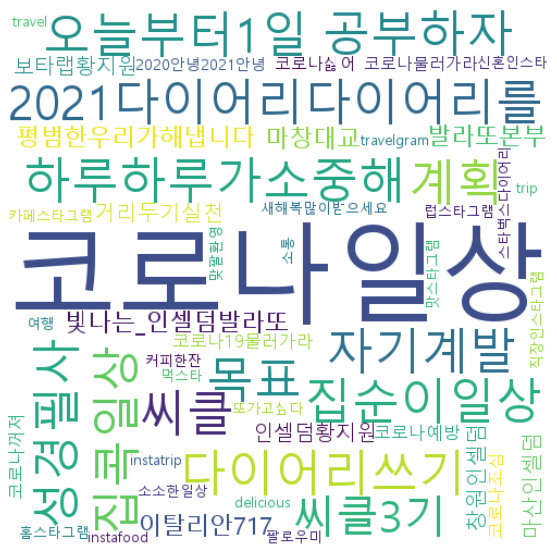

In [95]:
# 워드클라우드 파라미터 설정
#폰트 설정 주의! 
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

font_path="G:/workpy/zoom/malgun.ttf"  #폰트
background_color="white"      #배경색
margin=3                     #모서리 여백 넓이
min_font_size=7              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()